In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
unfilt_ab = od+expand(config['lr']['cerberus']['ab'], species='human')[0] 
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]

# pp_summary = '../'+expand(config['data']['p_pred']['summary'], species='human')[0]
iq_cerberus_h5 = od+expand(config['lr']['isoquant']['cerberus']['ca_annot'], species='human', obs_col='sample')[0]


iq_gtf = od+expand(config['lr']['isoquant']['gtf'], species='human')[0]
iq_ics = od+expand(config['lr']['isoquant']['cerberus']['ics'], species='human')[0]
iq_ab = od+expand(config['lr']['isoquant']['novel_ab'], species='human')[0]
iq_filt_ab = od+expand(config['lr']['isoquant']['cerberus']['ab'], species='human')[0]

ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
go_gene_subset = 'protein_coding'
predom_iso_subset = 'protein_coding'

m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]

In [20]:
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df, 
                         how='iso',
                         min_tpm=min_tpm,
                         gene_subset='polya')

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819


In [21]:
# get max expression of isoform across libraries
df = df.transpose()
df = df.reset_index(drop=True)
df.rename({'index':'dataset'}, axis=1, inplace=True)
df = df.max(axis=0).to_frame()
df.rename({0:'max_tpm'}, axis=1, inplace=True)
df = df.reset_index()
df.rename({'annot_transcript_id':'tid'}, axis=1, inplace=True)


In [22]:
# get transcript lengths
df2 = pd.read_csv(cerb_t_metadata, sep='\t')
df = df.merge(df2, how='left', on='tid')
df.head()

,tid,max_tpm,t_len,gid,gname,biotype,biotype_category,readthrough_transcript,MANE_Select,MANE_Plus_Clinical,tf
0,"ENSG00000000003[1,1,1]",10.657368,3876,ENSG00000000003.14,TSPAN6,protein_coding,protein_coding,False,False,False,False
1,"ENSG00000000003[1,1,5]",304.456970,2314,ENSG00000000003.14,TSPAN6,protein_coding,protein_coding,False,False,False,False
2,"ENSG00000000003[1,1,6]",26.218655,3233,ENSG00000000003.14,TSPAN6,protein_coding,protein_coding,False,False,False,False
3,"ENSG00000000003[1,1,7]",696.401575,2104,ENSG00000000003.14,TSPAN6,protein_coding,protein_coding,False,False,False,False
4,"ENSG00000000003[1,1,8]",203.213261,1290,ENSG00000000003.14,TSPAN6,protein_coding,protein_coding,False,False,False,False


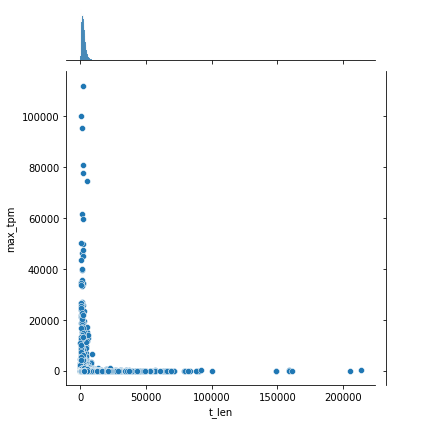

In [23]:
sns.jointplot(df, y='max_tpm', x='t_len')

In [ ]:
# split by biotype (ie the long ones are probably lncrnas)
# bin by length and do boxplot / violinplot

In [24]:
len(df.index)

209819

In [ ]:
# how long are predomiant isoforms? how often are they ISM isoforms? how much shorter are they than the known isoforms of a gene?